# Adding text and annotations to our charts

Make sure to first do the basic charts notebook before completing this notebook. This notebook relies on at least one chart you created in the previous lesson!

This lesson goes over how to add basic annotations to your data visualizations. Annotations can be useful for improving the readability of your charts, adding extra context to the data, or helping direct readers to what they should pay attention to. In this particular case, we’ll go over how to add annotations to a scatter plot.

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Setting up our data
Let's import the dataset we were using in lesson one (basic charts with matplotlib) that had crude birth, death and child mortality rates of countries around the world.

In [2]:
# importing dataset as a 'dataframe' (df) to analyze in python
filename = "https://raw.githubusercontent.com/ICFJ-Computational-Journalism/datasets/main/csv/iod-03222-crude-birth-rate-death-rate-child-mortality-rate-in-selected-countries-world-202-en.csv"
df = pd.read_csv(filename)

Now let's clean this dataset the same way we did in lesson one.

In [3]:
# split columns by dash (-)
df[['Region','Country', 'Misc']] = df['Region and country - Asia'].str.split(" - ",expand=True)

# convert columns to string: 'Region', 'Country', 'Misc'
df["Region"] = df["Region"].astype(str)
df["Country"] = df["Country"].astype(str)
df["Misc"] = df["Misc"].astype(str)

# filter the main dataframe to create separate dataframes separated by 'Region'
# for this lesson, we'll just focus on Asia
asia_df = df.loc[df['Country'] == 'Asia']

# switching the 'Region' and 'Country' colums
asia_df = asia_df.rename(columns={'Region': 'Country', 'Country': 'Region'})

# we can rename countries with longer names to one word for easier data analysis and visualization
asia_df = asia_df.replace({'Country':{"Iran, Islamic Republic":"Iran", "Azerbaijan, Republic of": "Azerbaijan"}})

### Making our initial chart
Now we're going to recreate the scatterplot of crude birth and death rates of specific countries in Asia (aka Iran and its neighbors).

In [4]:
# now let's filter asia_df to just get data from Iran's neighbors
iran_neighbors = asia_df[asia_df['Country'].isin(["Iran", "Azerbaijan", "Armenia", "Turkmenistan", "Pakistan", "Afghanistan", "Oman", "Turkey", "Iraq"])]
iran_neighbors # this should return a dataframe but with data on birth and death rates and child mortality rates from the countries above

,Region and country - Asia,Crude birth rate - per thousand population,Crude death rate - per thousand population,Child mortality rate is less than - One year - per thousand live births,Country,Region,Misc
1,"Azerbaijan, Republic of - Asia",14,6,11.0,Azerbaijan,Asia,None
3,Armenia - Asia,12,9,6.0,Armenia,Asia,None
5,Afghanistan - Asia,33,6,50.0,Afghanistan,Asia,None
8,"Iran, Islamic Republic - Asia",17,5,6.0,Iran,Asia,None
11,Pakistan - Asia,28,6,62.0,Pakistan,Asia,None
14,Turkmenistan - Asia,23,7,43.0,Turkmenistan,Asia,None
15,Turkey - Asia,18,5,9.0,Turkey,Asia,None
20,Iraq - Asia,27,4,23.0,Iraq,Asia,None
22,Oman - Asia,21,2,9.0,Oman,Asia,None


In [5]:
# let's get the x values for our scatter plot (birth rates)
iran_neighbors_birth = iran_neighbors['Crude birth rate - per thousand population']
iran_neighbors_birth

1     14
3     12
5     33
8     17
11    28
14    23
15    18
20    27
22    21
Name: Crude birth rate - per thousand population, dtype: int64

In [6]:
# and then let's get the y values for our scatter plots (death rates)
iran_neighbors_death = iran_neighbors['Crude death rate - per thousand population']
iran_neighbors_death

1     6
3     9
5     6
8     5
11    6
14    7
15    5
20    4
22    2
Name: Crude death rate - per thousand population, dtype: int64

In [7]:
iran_neighbors

,Region and country - Asia,Crude birth rate - per thousand population,Crude death rate - per thousand population,Child mortality rate is less than - One year - per thousand live births,Country,Region,Misc
1,"Azerbaijan, Republic of - Asia",14,6,11.0,Azerbaijan,Asia,None
3,Armenia - Asia,12,9,6.0,Armenia,Asia,None
5,Afghanistan - Asia,33,6,50.0,Afghanistan,Asia,None
8,"Iran, Islamic Republic - Asia",17,5,6.0,Iran,Asia,None
11,Pakistan - Asia,28,6,62.0,Pakistan,Asia,None
14,Turkmenistan - Asia,23,7,43.0,Turkmenistan,Asia,None
15,Turkey - Asia,18,5,9.0,Turkey,Asia,None
20,Iraq - Asia,27,4,23.0,Iraq,Asia,None
22,Oman - Asia,21,2,9.0,Oman,Asia,None


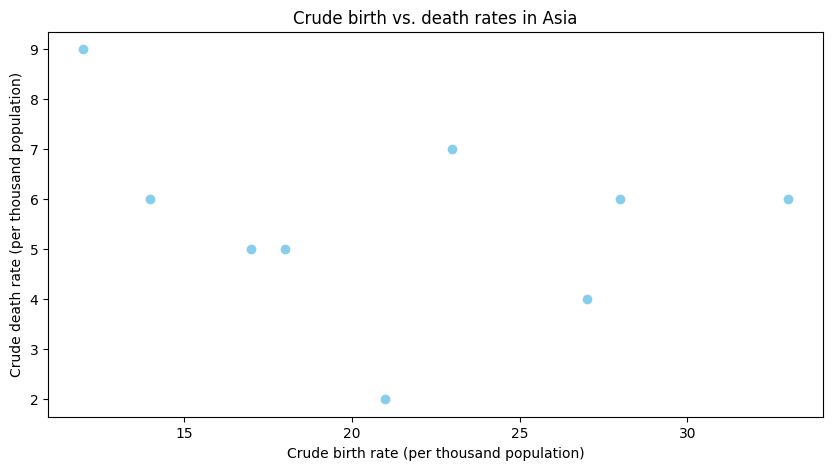

In [8]:
# we need to make a 'subplot,' the 'ax' variable, in order to add data point labels
fig, ax = plt.subplots(figsize=(10,5))

# passing this data to the scatter plot
plt.scatter(iran_neighbors_birth, iran_neighbors_death, color='skyblue')

# setting the chart title, along with the x and y-axis labels
plt.xlabel("Crude birth rate (per thousand population)")
plt.ylabel("Crude death rate (per thousand population)")
plt.title("Crude birth vs. death rates in Asia")

plt.show()

The above is essentially the same chart we created in our previous lesson. Now let's try making annotations.

## Adding annotations

### Annotating every point

To add annotations, we basically create a for loop that iterates through every row of our data and calls `plt.text()`. For each `plt.text()`, we provide:
* the x-value,
* the y-value,
* the text we want to put on the label (in this case the country name)
* and the font size of the label.

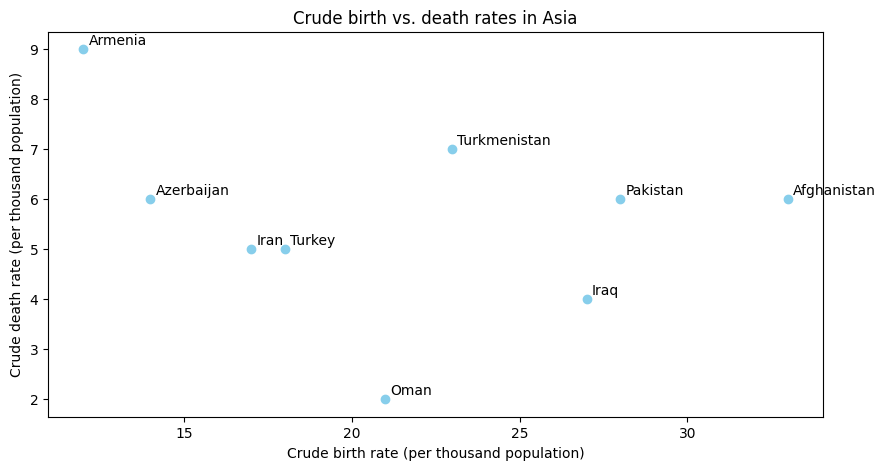

In [9]:
# we need to make a 'subplot,' the 'ax' variable, in order to add data point labels
fig, ax = plt.subplots(figsize=(10,5))

# passing this data to the scatter plot
plt.scatter(iran_neighbors_birth, iran_neighbors_death, color='skyblue')

# setting the chart title, along with the x and y-axis labels
plt.xlabel("Crude birth rate (per thousand population)")
plt.ylabel("Crude death rate (per thousand population)")
plt.title("Crude birth vs. death rates in Asia")

# now it's time to add labels to the points

# then what the label should contain (in this case, 'Country')
# and lastly the font size
for i in range(len(iran_neighbors_birth)): # we're looping through EACH country in our dataset we're visualizing - in this case, JUST data from Iran and its neighbors
  plt.text(
    iran_neighbors_birth.reset_index(drop=True)[i] + 0.15, # and for each country, we're plotting its datapoint so we need the 'x' value (country birth rate)
    iran_neighbors_death.reset_index(drop=True)[i] + 0.1, # and the country's 'y' value (country death rate)
    iran_neighbors["Country"].reset_index(drop=True)[i], # and then the label corresponding to that country (the country name - contained in "Country")
    size=10 # and lastly the font size of the label
  )

plt.show()

Now we have country labels corresponding to their dot on the scatterplot comparing crude birth and death rates, and we can visually see how Iran compares relative to its neighbors.

### Adding singular annotations

We might need annotations to point out specific data points within a larger dataset. Let's say we want to point out Iran's data point specifically with an **arrow.** After recreating the same scatterplot, we can add the arrow annotation using `ax.annotate()`.


Text(8    18
Name: Crude birth rate - per thousand population, dtype: int64, 8    6
Name: Crude death rate - per thousand population, dtype: int64, 'Iran')

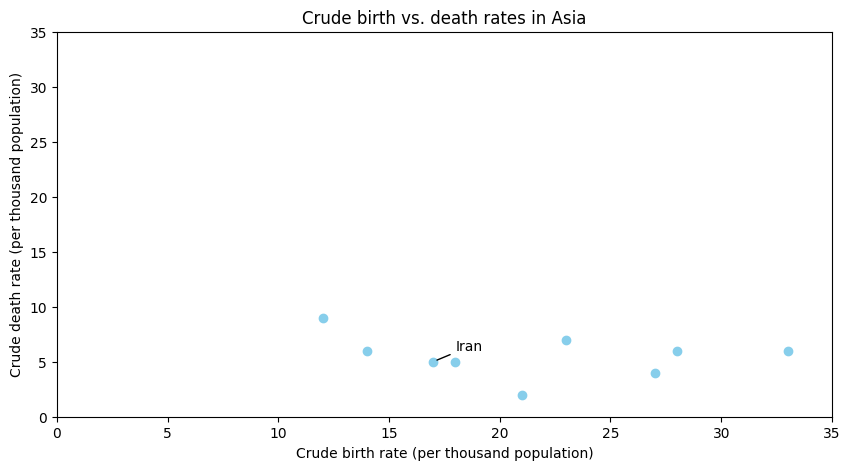

In [34]:
# we need to make a 'subplot,' the 'ax' variable, in order to add data point labels
fig, ax = plt.subplots(figsize=(10,5))

# passing this data to the scatter plot
plt.scatter(iran_neighbors_birth, iran_neighbors_death, color='skyblue')

# setting the chart title, along with the x and y-axis labels
plt.xlabel("Crude birth rate (per thousand population)")
plt.ylabel("Crude death rate (per thousand population)")
plt.title("Crude birth vs. death rates in Asia")

# making the axes the same scale (from 0 to 35)
plt.xlim(0, 35)
plt.ylim(0, 35)

# now it's time to add the arrow pointing out "Iran"

# Iran's data point x-coordinate
arrow_x = iran_neighbors[iran_neighbors["Country"]=="Iran"]["Crude birth rate - per thousand population"]

# Iran's data point y-coordinate
arrow_y = iran_neighbors[iran_neighbors["Country"]=="Iran"]["Crude death rate - per thousand population"]

ax.annotate("Iran", # the text accompanying the arrow annotation
            xy=(arrow_x + 0.05, arrow_y + 0.05), # the position of the arrow head - we can offset the arrow slightly away from the point to make it look better
            xytext=(arrow_x + 1, arrow_y + 1), # the position of the text accompanying the arrow
            arrowprops=dict(arrowstyle="-")) # the style of the arrow

Good job on completing the second lesson on text annotations! Below are additional resources for adding general or context-specific annotations using matplotlib.

### Additional resources

* Annotating [matplotlib charts](https://www.python-graph-gallery.com/193-annotate-matplotlib-chart) - adding shapes and arrows
* Working with the [arrow annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html) in matplotlib
* Annotating charts [with text](https://python-charts.com/matplotlib/texts/)